<p style="font-size: 20px;">DEEPCFD</p>

<span style="font-size: 15px;">
    <ol>
        <li>
            <strong style="color: #334BFF;">模型简介</strong><br><br>
            DeepCFD是一个求解计算流体力学（CFD）问题的深度学习项目，采用PyTorch框架，支持UNet, UNetEx 和 AutoEncoder三种模型结构。网络基于卷积神经网络（CNN）构建，用于解决不同几何条件下流场的预测问题。下面是UNet网络结构的示意图。<br><br>
     <div style="max-width: 700px; margin: auto;">
                <img src="./ReadmeFiles/arch.png" alt="模型架构图" style="width:100%; height: auto; display: block; margin:10px 0;" />
            </div>   </div>
            在这个案例中，我们使用二维管道流，其中包含各种形状的障碍物。模型的输入是管道的几何信息，输出是二维速度ux，uy和压力p。<br><br>
        </li>
        <li>
            <strong style="color: #334BFF;">环境依赖</strong><br><br>
            本项目环境基于Python 3.10，DTK 24.04，PyTorch 2.0, OneScience, json, pickle, getopt等依赖库。<br><br>
            在超算互联网平台上，我们提供了预先配置好的镜像，创建容器后即可获得已经设置好的运行环境，实现一键运行。<br><br>
            如果onescience更新，需要手动安装onescience， onescience的包位于deepcfd工程文件中。<br><br>
            可以使用以下指令手动更新安装onescience。<br><br>
        </li>
    </ol>
</span> 

In [ ]:
!pip install onescience-0.1.0-py3-none-any.whl

<span style="font-size: 15px;">
    <ol start="3">
        <li>
            <strong style="color: #334BFF;">环境检测</strong><br><br>
            环境检测包含pytorch版本和dcu环境检测。
        </li>
    </ol>
</span>

In [21]:
import torch
version = torch.__version__
num = float(version[:3])
assert num >= 2.0, "Pytorch version must >= 2.0"

assert torch.cuda.is_available(), "Pytorch need DCU"

<span style="font-size: 15px;">
    <ol start="4">
        <li>
            <strong style="color: #334BFF;">素材准备</strong><br><br>
            素材在DeepCFD中，其中包含文件 dataX 和 dataY，为项目所需要的输入数据和标签数据。
        </li>
    </ol>
</span>

In [ ]:
!unzip DeepCFD.zip

<span style="font-size: 15px;">
    <ol start="5">
        <li>
            <strong style="color: #334BFF;">训练</strong><br><br>
            通过net参数选项指定网络结构。<br><br>
            可选UNet, UNetEx 和 AutoEncoder。<br><br>
            model-input和model-output分别指定上一步下载的输入和标签数据。<br><br>
            下表是模型训练的参考参数设置。<br>
            <table border="1" cellpadding="5" cellspacing="0" style="border-collapse: collapse; margin: 20px 0;">
                <thead>
                    <tr>
                        <th style="text-align: left;">Parameter</th>
                        <th style="text-align: right;">Value</th>
                    </tr>
                </thead>
                <tbody>
                    <tr>
                        <td>Learning rate</td>
                        <td style="text-align: right;">1e-3</td>
                    </tr>
                    <tr>
                        <td>Kernel size</td>
                        <td style="text-align: right;">5</td>
                    </tr>
                    <tr>
                        <td>Filters</td>
                        <td style="text-align: right;">[8,16,32,32]</td>
                    </tr>
                    <tr>
                        <td>Batch size</td>
                        <td style="text-align: right;">64</td>
                    </tr>
                    <tr>
                        <td>Weight decay</td>
                        <td style="text-align: right;">0.005</td>
                    </tr>
                    <tr>
                        <td>Batch norm</td>
                        <td style="text-align: right;">off</td>
                    </tr>
                    <tr>
                        <td>Weight norm</td>
                        <td style="text-align: right;">off</td>
                    </tr>
                </tbody>
            </table>
            训练命令如下：<br><br>
        </li>
    </ol>
</span>

In [22]:
!python deepcfd.py \
        --net UNetEx \
        --model-input ./dataX.pkl \
        --model-output ./dataY.pkl \
        --output checkpoint.pt \
        --kernel-size 5 \
        --filters 8,16,32,32 \
        --epochs 20 \
        --batch-size 32

Output directory: /public/home/liudong6/wangxian/DeepCFD
Epoch #1
	Train Loss = 166320012.625
	Train Total MSE = 1536.2780925428208
	Train Ux MSE = 1462.6608708773688
	Train Uy MSE = 65.0317231336766
	Train p MSE = 8.585517805449816
	Validation Loss = 42346347.6875
	Validation Total MSE = 896.0570345603813
	Validation Ux MSE = 877.6913996292373
	Validation Uy MSE = 15.05782470703125
	Validation p MSE = 3.307824441942118
Model saved!
Validation loss decreased (inf --> 42346347.687500).  Saving model ...
Epoch #2
	Train Loss = 79350220.125
	Train Total MSE = 706.5595582122357
	Train Ux MSE = 690.526703147777
	Train Uy MSE = 13.569398373973613
	Train p MSE = 2.463453487474091
	Validation Loss = 21873478.875
	Validation Total MSE = 412.25924010195973
	Validation Ux MSE = 397.2550632282839
	Validation Uy MSE = 12.294946858034296
	Validation p MSE = 2.7092298087427173
Model saved!
Validation loss decreased (42346347.687500 --> 21873478.875000).  Saving model ...
Epoch #3
	Train Loss = 247337

<span style="font-size: 15px;">
    <ol start="6">
        <li>
            <strong style="color: #334BFF;">可视化训练结果</strong><br><br>
            需要修改model_input，model_output为数据路径<br><br>
            model_path为训练保存模型路径<br><br>
            最后可以看出训练网络和openfoam求解器求解结果的对比，以及两者之间的误差<br><br>
        </li>
    </ol>
</span>

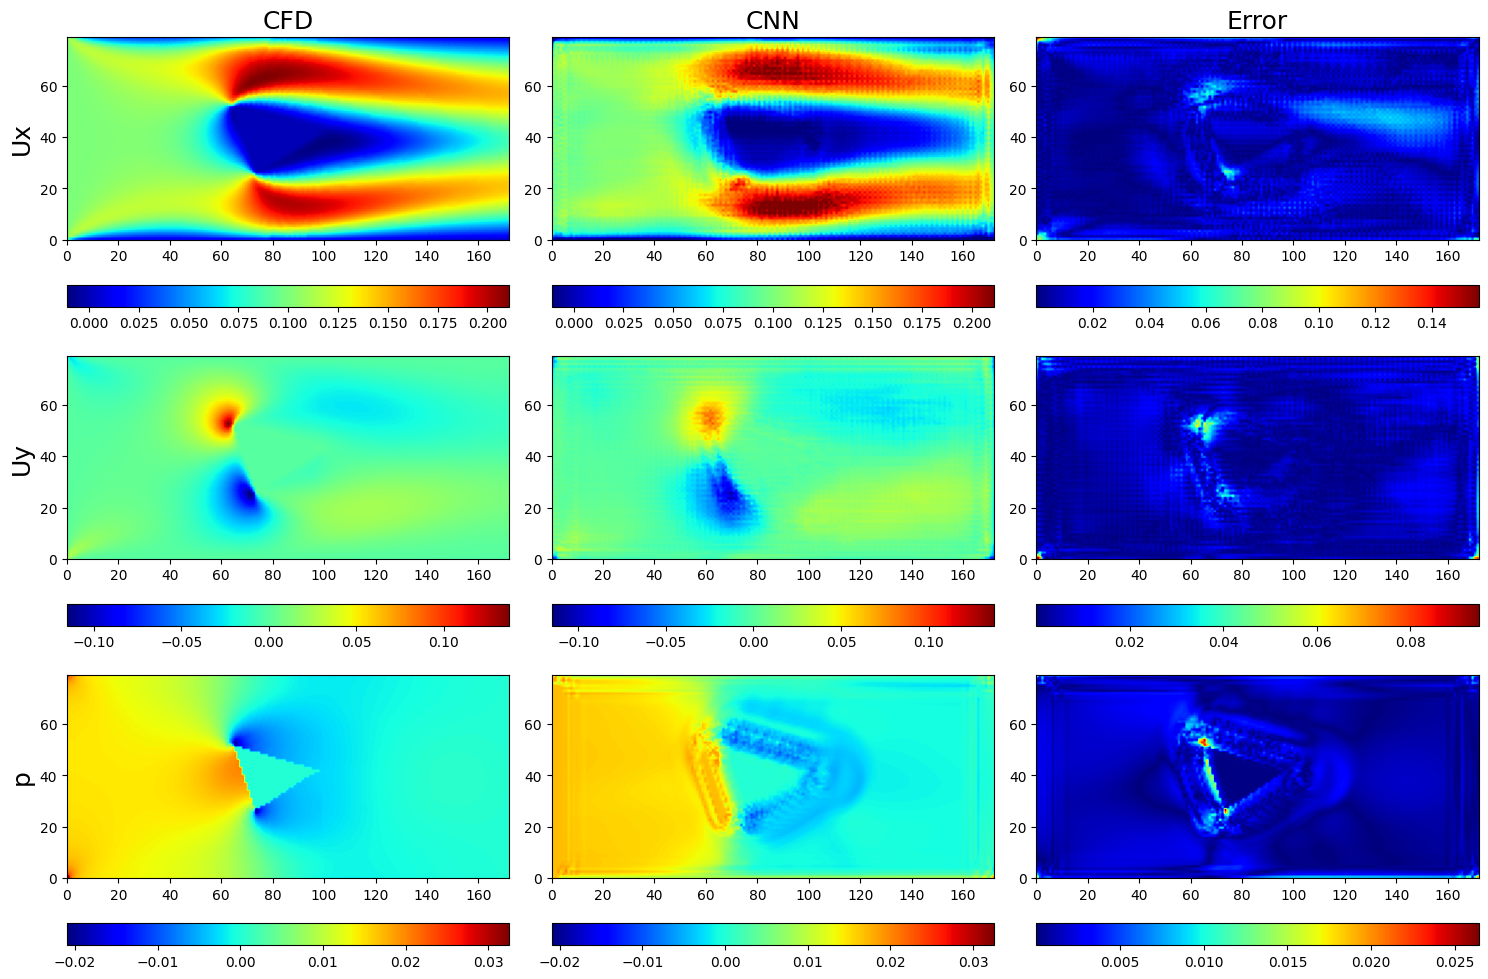

In [23]:
import os
import json
import torch
import pickle
import random
from onescience.utils.deepcfd.train_functions import *
from onescience.utils.deepcfd.functions import *
from torch.utils.data import TensorDataset

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
kernel_size = 5
filters = [8, 16, 32, 32]
model_input = "./dataX.pkl"
model_output = "./dataY.pkl"
from onescience.models.deepcfd.UNetEx import UNetEx
net = UNetEx
model_path = './checkpoint.pt'

options = {
    'device': device,
    'net': net,
    'model_input': model_input,
    'model_output': model_output,
    'kernel_size': kernel_size,
    'filters': filters,
    'model_path':model_path
}

x = pickle.load(open(options["model_input"], "rb"))
y = pickle.load(open(options["model_output"], "rb"))

# Shuffle the data
indices = list(range(len(x)))
random.shuffle(indices)
x = x[indices]
y = y[indices]

x = torch.FloatTensor(x)
y = torch.FloatTensor(y)

batch = x.shape[0]
nx = x.shape[2]
ny = x.shape[3]

channels_weights = torch.sqrt(torch.mean(y.permute(0, 2, 3, 1)
    .reshape((batch*nx*ny,3)) ** 2, dim=0)).view(1, -1, 1, 1).to(options["device"])


# Spliting dataset into 70% train and 30% test
train_data, test_data = split_tensors(x, y, ratio=0.7)

train_dataset, test_dataset = TensorDataset(*train_data), TensorDataset(*test_data)
test_x, test_y = test_dataset[:]

torch.manual_seed(0)

model = options["net"](
    3,
    3,
    filters=options["filters"],
    kernel_size=options["kernel_size"],
    batch_norm=False,
    weight_norm=False
)

if torch.cuda.device_count() > 1:
    model = torch.nn.DataParallel(model)

model.to(options["device"])  # Move the model to the appropriate device
model.load_state_dict(torch.load(options["model_path"]), strict = False)
model.eval()

out = model(test_x[:10].to(options["device"]))
error = torch.abs(out.cpu() - test_y[:10].cpu())
s = 0
visualize(
    test_y[:10].cpu().detach().numpy(),
    out[:10].cpu().detach().numpy(),
    error[:10].cpu().detach().numpy(),
    s
)